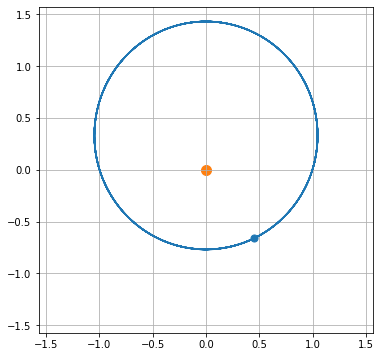

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def velocity_x(t, x, vx, y, vy):
    return vx

def velocity_y(t, x, vx, y, vy):
    return vy

def acceleration_x(t, x, vx, y, vy):
    r = np.sqrt(x**2.0 + y**2.0)
    return -(x/r) *  1/ r**2
    
def acceleration_y(t, x, vx, y, vy):
    r = np.sqrt(x ** 2.0 + y ** 2.0)
    return -(y/r) * 1 / r**2
    
def rungekutta_method(x0, y0, vx0, vy0, t0, t1):
    ### time interval ###
    h = 0.01
    N = int((t1 - t0) / h)

    ### initial ###
    xs, vxs, ys, vys, ts = [x0], [vx0], [y0], [vy0], np.linspace(t0, t1, N)

    for i in range(1, N):
        ### equation for x ### : dx/dt = v

        t = t0 + h*(i-1)

        k1x = velocity_x(t, x0, vx0, y0, vy0)
        k1vx = acceleration_x(t, x0, vx0, y0, vy0)
        k1y = velocity_y(t, x0, vx0, y0, vy0)
        k1vy = acceleration_y(t, x0, vx0, y0, vy0)

        k2x = velocity_x(t+h/2, x0+h*k1x/2, vx0+h*k1vx/2, y0+h*k1y/2, vy0+h*k1vy/2)
        k2vx = acceleration_x(t+h/2, x0+h*k1x/2, vx0+h*k1vx/2, y0+h*k1y/2, vy0+h*k1vy/2)
        k2y = velocity_y(t+h/2, x0+h*k1x/2, vx0+h*k1vx/2, y0+h*k1y/2, vy0+h*k1vy/2)
        k2vy = acceleration_y(t+h/2, x0+h*k1x/2, vx0+h*k1vx/2, y0+h*k1y/2, vy0+h*k1vy/2)

        k3x = velocity_x(t+h/2, x0+h*k2x/2, vx0+h*k2vx/2, y0+h*k2y/2, vy0+h*k2vy/2)
        k3vx = acceleration_x(t+h/2, x0+h*k2x/2, vx0+h*k2vx/2, y0+h*k2y/2, vy0+h*k2vy/2)
        k3y = velocity_y(t+h/2, x0+h*k2x/2, vx0+h*k2vx/2, y0+h*k2y/2, vy0+h*k2vy/2)
        k3vy = acceleration_y(t+h/2, x0+h*k2x/2, vx0+h*k2vx/2, y0+h*k2y/2, vy0+h*k2vy/2)

        k4x = velocity_x(t+h, x0+h*k3x, vx0+h*k3vx, y0+h*k3y, vy0+h*k3vy)
        k4vx = acceleration_x(t+h, x0+h*k3x, vx0+h*k3vx, y0+h*k3y, vy0+h*k3vy)
        k4y = velocity_y(t+h, x0+h*k3x, vx0+h*k3vx, y0+h*k3y, vy0+h*k3vy)
        k4vy = acceleration_y(t+h, x0+h*k3x, vx0+h*k3vx, y0+h*k3y, vy0+h*k3vy)

        x1 = x0 + h*(k1x + 2*k2x + 2*k3x + k4x)/6
        vx1 = vx0 + h*(k1vx + 2*k2vx + 2*k3vx + k4vx)/6
        y1 = y0 + h*(k1y + 2*k2y + 2*k3y + k4y)/6
        vy1 = vy0 + h*(k1vy + 2*k2vy + 2*k3vy + k4vy)/6

        xs.append(x1)
        ys.append(y1)
        vxs.append(vx1)
        vys.append(vy1)

        x0 = x1
        y0 = y1
        vx0 = vx1
        vy0 = vy1

    return np.array(ts), np.array(xs), np.array(ys), np.array(vxs), np.array(vys)

def update(num, Z, point, line):
    point.set_offsets(Z[num])
    line.set_data(Z[:num, 0], Z[:num, 1])


if __name__ == '__main__':
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes()
    ax.grid()
    
    T, X, Y, VX, VY = rungekutta_method(1, 0, 0.3, 1.0, 0.0, 50)

    X, Y = X[::10], Y[::10]
    Z = np.hstack([X.reshape(-1,1), Y.reshape(-1,1)])
    N = len(X)

    xmax = max([np.abs(X).max(), np.abs(Y).max()])
    ax.set_xlim(-xmax*1.1, xmax*1.1)
    ax.set_ylim(-xmax*1.1, xmax*1.1)

    point = ax.scatter([], [], s=50)
    line, = ax.plot([], [])
    ax.scatter([0], [0], s= 100)

    ani = animation.FuncAnimation(fig, update, N, fargs=(Z, point, line), interval=10, blit=False)
    ani.save('a.gif', writer=animation.PillowWriter(fps=30))
    plt.show()